Nombres Integrantes:

1. Cristhian Plazas Ortega
2. Esteban Santa García
3. Oscar Malagón
4. Juan Manuel Sáenz

Taller
Un estudio nutricional ha realizado un experimento a 78 pacientes para demostrar 3 diferentes tipos de dietas que quieren llevar al mercado. Sin embargo por falta de presupuesto solo pueden lanzar al mercado una de las dietas que experimentaron. Para ello le han propuesto realizar un estudio ANOVA para determinar cual es el tipo de dieta que deberían lanzar al mercado.

Siguiendo la metodología de ANOVA, realice los siguientes pasos: 
1. Importe los datos del archivo Diet.xlsx 
2. Realice un nuevo campo con la diferencia de peso registrado entre las 6 semanas de estudio. 
3. Verifique los supuestos y realice las modificaciones necesarias. 
4. Determine si existe suficientes pruebas estadísticas para demostrar que las dietas no son iguales. 
5. Determine el mejor tipo de dieta para lanzar al mercado

Un expertó sugirió que el peso
de los pacientes no sólo influía por la dieta realizada, sino también por el género del paciente. Por lo tanto le pidió que repita el procedimiento anterior realizando un ANOVA de dos factores para determinar cual es la mejor dieta para cada género.


## ANOVA de una vía

Unidad experimental: Personas que hacen la dieta = 78 Estudiantes

Factor: Dieta

Nivel: A,B,C

Tratamiento: todos los niveles

Respuesta: Peso de cada persona

In [3]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats

df = pd.read_excel("Diet.xlsx")
df["difweight"] = df["weight"] - df["weight6weeks"]
df["index"] = df.index

In [4]:
model = ols('difweight ~ C(Diet)', data=df[["index","Diet","difweight"]]).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Diet),71.093689,2.0,6.197447,0.003229
Residual,430.179259,75.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-0.2741,0.9,-1.8806,1.3325,False
A,C,1.8481,0.0201,0.2416,3.4547,True
B,C,2.1222,0.0048,0.5636,3.6808,True


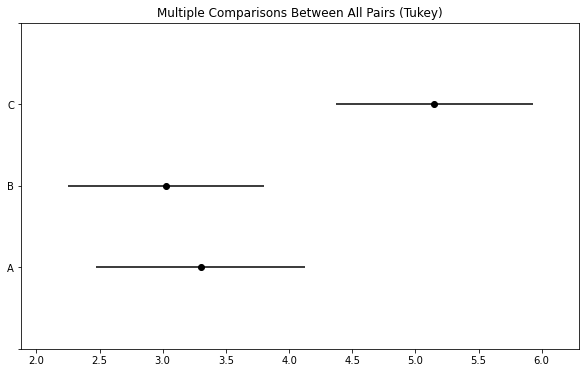

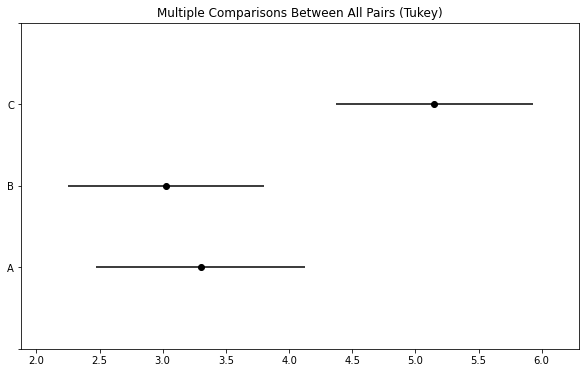

In [5]:
m_comp = pairwise_tukeyhsd(endog=df['difweight'], groups=df['Diet'], alpha=0.05)
display(m_comp.summary())
m_comp.plot_simultaneous()

A pesar de que A y B son parecidos.., B es más grande A. B sigue siendo más grande que C por lo que la dieta que más afecta la experimentación es B.

In [7]:
w, pvalue = stats.levene(df.loc[df['Diet'].isin(["A"])]["difweight"], df.loc[df['Diet'].isin(["B"])]["difweight"], df.loc[df['Diet'].isin(["C"])]["difweight"])
print(w, pvalue)

0.6256665777896312 0.5376731304274011


In [8]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9920806288719177 0.9160743355751038


En ninguno de los dos tests, se logró rechazar la hipótesis nula, por un lado, no se puede rechazar que las varianzas sean diferentes, todas son iguales y por otro lado, podemos concluir que los datos provienen de una distribución normal por lo que ANOVA no sería un determinante en éste test.

## Factor de dos Vías

Unidad experimental: Personas que hacen la dieta

Factor: Dieta, género

Nivel: Para Dieta: A, B, C. Para género: M, F

Tratamiento: combinación de los niveles

Respuesta: Peso de cada persona

In [10]:
model = ols('difweight ~ C(Diet) + C(gender) + C(Diet):C(gender)', data=df[["index","gender","Diet","difweight"]]).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Diet),71.007031,2.0,6.313248,0.002977
C(gender),0.135526,1.0,0.024099,0.877067
C(Diet):C(gender),25.140704,2.0,2.235264,0.114336
Residual,404.903029,72.0,NaN,NaN


Se puede concluir que la media de de los niveles de gender no varían significativamente dado que F no es mayor que alpha y tampoco lo hace el p-value. La combinación de los dos factores tampoco rechaza la hipótesis nula de ANOVA. Sólo lo hace el factor Diet